## Hierarchical clustering
● Every class/datapoint begins in a separate cluster

● At each step, the two closest clusters are merged

● Continue until all merge in a single cluster

● This is “agglomerative” hierarchical clustering

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram

In [2]:
df = pd.read_csv(r'data/NLS/2D_points.txt', delim_whitespace=True,header=None,names=['x_pts','y_pts'])

In [3]:
df.head()

,x_pts,y_pts
0,-0.266484,0.574908
1,-0.336049,0.648162
2,0.886191,1.179274
3,1.552619,1.225525
4,1.831822,0.585167


- __agglomerative clustering__ is the act of forming clusters from the bottom up.

- We __start with single observations as clusters, then iteratively assign them to the nearest cluster.__

- Eventually we end up with a number of clusters (which need to be specified in advance).


## Linkage methods
Which method should use?

__single__: based on two closest objects

__complete__: based on two farthest objects

__average__: based on the arithmetic mean of all objects

__centroid__: based on the geometric mean of all objects

__median__: based on the median of all objects

__ward__: based on the sum of squares

![title](linkagemethod.png)

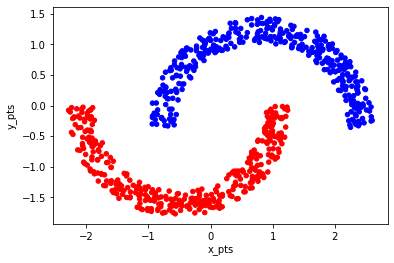

In [4]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage() function
distance_matrix = linkage(df[['x_pts', 'y_pts']], method = 'single', metric = 'euclidean')

# Assign cluster labels
df['cluster_labels'] = fcluster(distance_matrix, 2,criterion='maxclust')

# Define a colors dictionary for clusters
colors = {1:'red', 2:'blue'}

# Plot a scatter plot
df.plot.scatter(x ='x_pts' , y = 'y_pts',c = df['cluster_labels'].apply(lambda x:colors[x]))
plt.show()

In [5]:
datam=df.iloc[:,0:-1].values

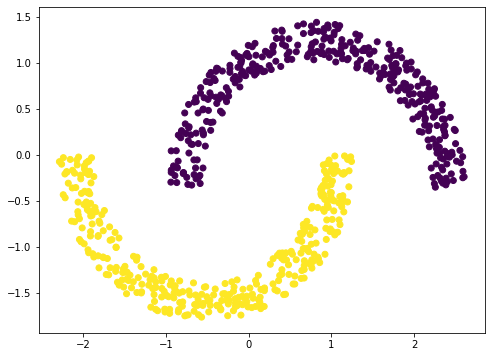

In [6]:
from sklearn.cluster import AgglomerativeClustering
Ag=AgglomerativeClustering(n_clusters=2,linkage="single")
Ag.fit(datam)
# labels=Ag.predict(data)
plt.figure(figsize=(8, 6))
plt.scatter(datam[:,0],datam[:,1], c=Ag.labels_.astype(float))

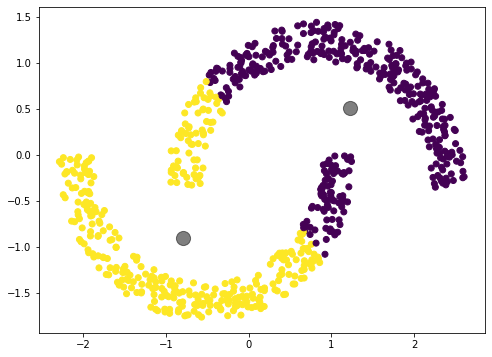

In [7]:
model = KMeans(n_clusters = 2)
model.fit(datam)
labels = model.predict(datam)
plt.figure(figsize=(8, 6))
plt.scatter(datam[:,0], datam[:,1], c=model.labels_.astype(float))
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

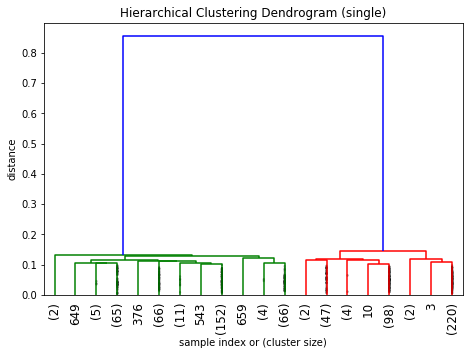

In [8]:
figure = plt.figure(figsize=(7.5, 5))
dendrogram(distance_matrix, truncate_mode='lastp',  # show only the last p merged clusters
    p=20,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)

plt.title('Hierarchical Clustering Dendrogram (single)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
plt.show()


## DBScan versus K-means
- No need to predefine amount of clusters
- Adjust maximum distance between points within clusters
- Assign minimum amount of samples in clusters
- Better performance on weirdly shaped data
- But..higher computational costs

__The key idea of the DBSCAN algorithm is that for each data point in a cluster, the neighborhood within a given radius has to contain at least a minimum number of points, i.e. the density of the neighborhood has to exceed some threshold__.

__DBSCAN has three main parameters to set:__

__eps__: The maximum distance from an observation for another observation to be considered its neighbor.

__min_samples__: The minimum number of observation less than eps distance from an observation for to be considered a core observation.

__metric__: The distance metric used by eps. For example, minkowski, euclidean, etc. (note that if Minkowski distance is used, the parameter p can be used to set the power of the Minkowski metric)

In [9]:
# Import DBSCAN
from sklearn.cluster import DBSCAN

# Initialize and fit the DBscan model
db = DBSCAN(eps=0.05, min_samples=50).fit(datam)

# Obtain the predicted labels and calculate number of clusters
pred_labels = db.labels_
n_clusters = len(set(pred_labels))

# Print performance metrics for DBscan
print('Estimated number of clusters: %d' % n_clusters)



Estimated number of clusters: 1


In [10]:
# Initialize and fit the DBscan model
db = DBSCAN().fit(datam)

# Obtain the predicted labels and calculate number of clusters
pred_labels = db.labels_
n_clusters = len(set(pred_labels))

# Print performance metrics for DBscan
print('Estimated number of clusters: %d' % n_clusters)



Estimated number of clusters: 2


## Lab Code

In [11]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
digits = load_digits()
digits=scale(digits.data)


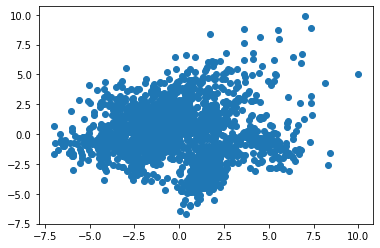

In [12]:
reduced_data = PCA(n_components=2).fit_transform(digits)
plt.scatter(reduced_data[:,0],reduced_data[:,1])

In [13]:
dataframe=pd.DataFrame(reduced_data,columns=['comp1','comp2'])

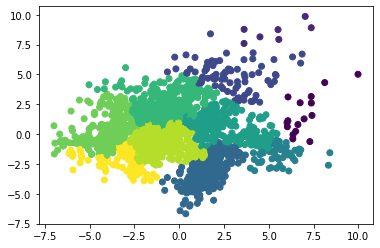

In [20]:

# Use the linkage() function
distance_matrix = linkage(reduced_data, method = 'complete', metric = 'euclidean')

# Assign cluster labels
dataframe['cluster_labels'] = fcluster(distance_matrix, 10,criterion='maxclust')

# Plot a scatter plot
# sns.scatterplot(x='comp1',y='comp2',hue='cluster_labels',data=dataframe)
plt.scatter(reduced_data[:,0],reduced_data[:,1],c=dataframe['cluster_labels'])
plt.show()

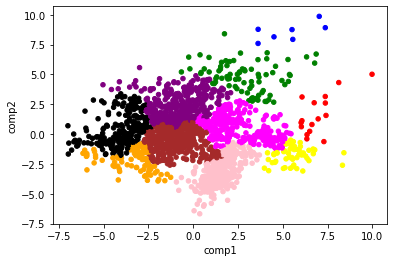

In [15]:
colors = {1:'red', 2:'blue',3:'green',4:'pink',5:'yellow',
          6:'magenta',7:'purple',8:'black',9:'brown',10:'orange'}

# Plot a scatter plot
dataframe.plot.scatter(x ='comp1' , y = 'comp2',c = dataframe['cluster_labels'].apply(lambda x:colors[x]))


In [16]:
reduced_data

array([[ 1.91420798, -0.95447779],
       [ 0.5889878 ,  0.92460931],
       [ 1.302033  , -0.31714876],
       ...,
       [ 1.02260705, -0.14792286],
       [ 1.0760663 , -0.38091518],
       [-1.2577043 , -2.22760061]])

[5 2 2 ... 2 2 6]


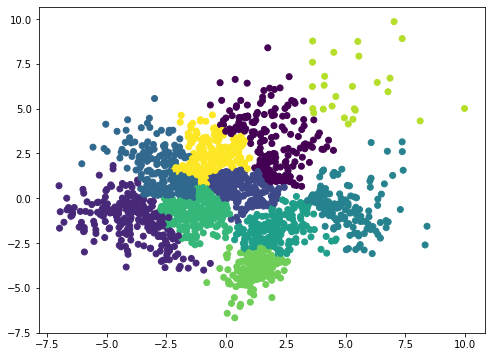

In [17]:
from sklearn.cluster import AgglomerativeClustering
Ag=AgglomerativeClustering(n_clusters=10)
Ag.fit(reduced_data)
# labels=Ag.predict(data)
print(Ag.labels_)
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:,0],reduced_data[:,1], c=Ag.labels_.astype(float))

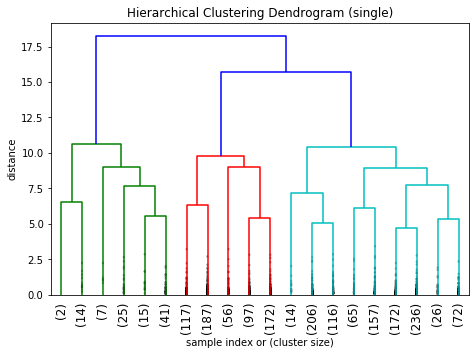

In [18]:
figure = plt.figure(figsize=(7.5, 5))
dendrogram(distance_matrix, truncate_mode='lastp',  # show only the last p merged clusters
    p=20,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)

plt.title('Hierarchical Clustering Dendrogram (single)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
plt.show()
